# QiTech Thermostat Controller Challenge
## Scenario
We have a high-mass element A of which we can measure the temperature of.

We have a low-mass element B which we can heat. Both Elements are in contact to each other. Element B can also discapate heat to the environment.

## Goal
Create an algorithm that control the power of the heating element. Your controller have persitent values and a function `control` which takes the measures temperature of element A, the target temperature (constant) and the constant ambient temperature. `dt` is the time delta in seconds (always `1`). 
Only control signal from `0`-`1` have effect. `1` means maximum heating power.

Its your goal to build a generalistic thermostat controller (as we don't know the exact properties ofour real system) that improves core metrics.

## Simulation
We have a simple simulatoin called `TemperatureSimulation` with standard properties that don't change. `SuperTemperatureSimulation` runs many simulations with different properties so we can see how your controller behaves in different situations.

## Metrics
### Mean Error
Mean error calculated after 1800 seconds.
The error is the target temp - measured temp in C.

This tracks the steady state error fo your controller and should be near 0.

## Error STD
Standard deviation (sigma) of the error after 1800 seconds.

This tracks the temperature oscillation and should be near 0.

## Overshoot
The maxmumum overshoot the system produced. Overshoot is the maxmimum measured temperature - target temperature.

overshoot should be minimal.

## Time to reach ±0.5°C
This metric tracks the time your controller needs to reach a stable temperature in seconds.

This metric should also be minimized.

Running single simulation with default parameters...
Simulation Parameters:
Element A (measured element):
- Mass: 1.0 kg
- Specific Heat Capacity: 490 J/(kg·°C)

Element B (heating element):
- Mass: 0.4 kg
- Specific Heat Capacity: 400 J/(kg·°C)

Heat Transfer:
- A-B Contact Area: 0.5 m²
- A-B Heat Transfer Coefficient: 100 W/(m²·°C)
- B-Air Contact Area: 0.5 m²
- B-Air Heat Transfer Coefficient: 10 W/(m²·°C)

Environment:
- Ambient Temperature: 25 °C

Simulation Settings:
- Total Time: 3600 seconds
- Time Step (dt): 1 seconds
Simulation Statistics:
- Mean Error (after 1800s): -0.00 °C
- Error STD (after 1800s): 0.03 °C
- Overshoot Error: 47.24 °C
- Final Element A Temperature: 149.97 °C
- Final Element B Temperature: 149.99 °C
- Maximum A-B Temperature Difference: 10.07 °C
- Time to reach ±0.5°C: 1105.00 seconds


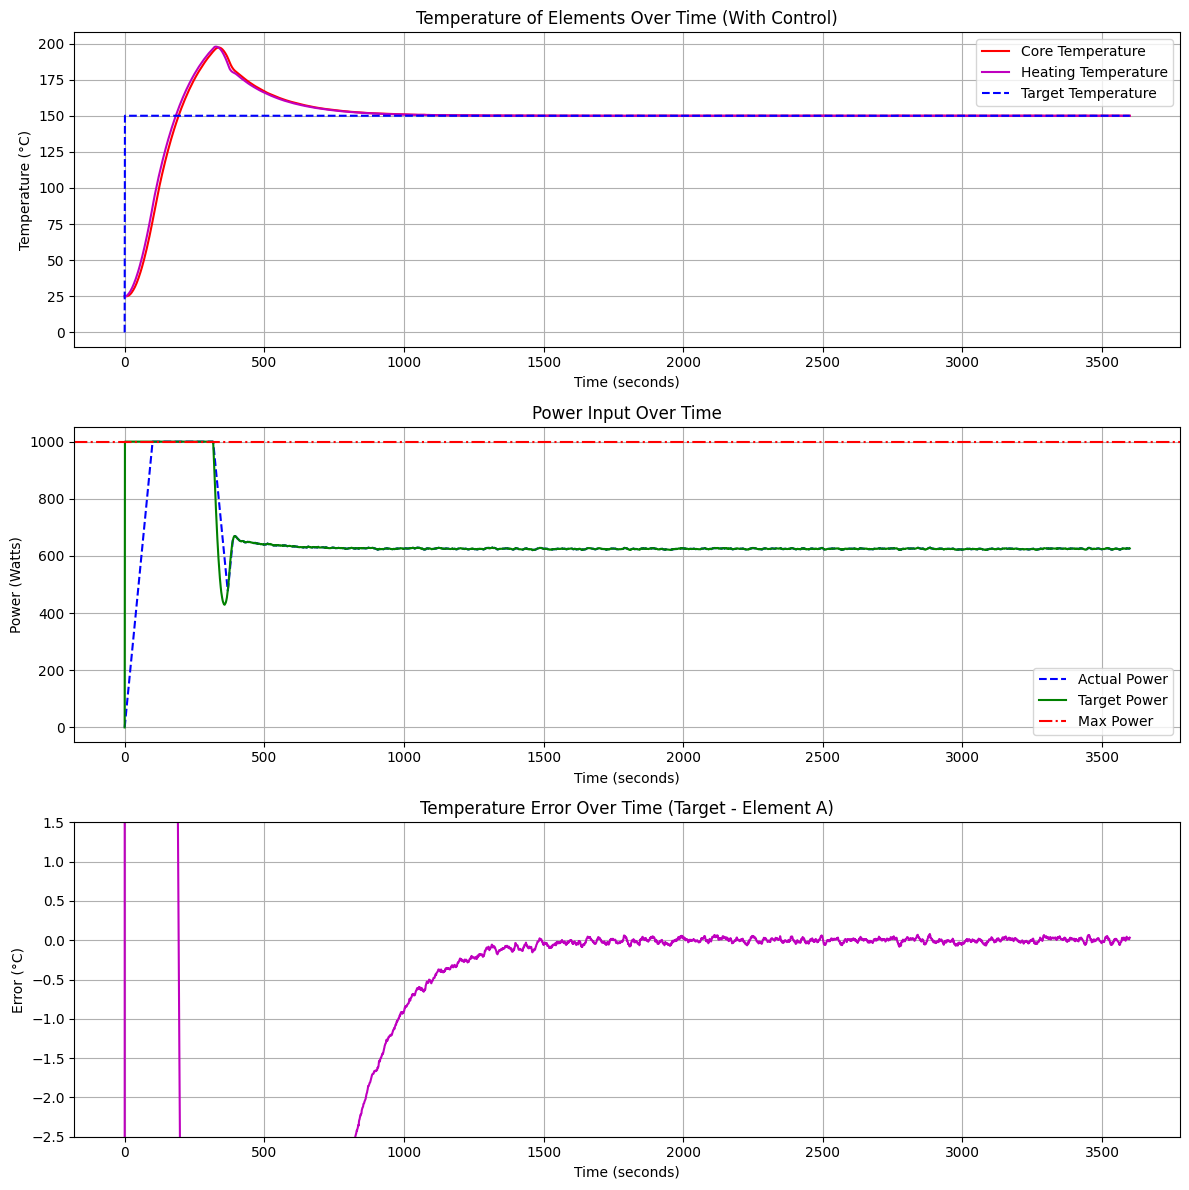

In [1]:
import tempsim
def create_controller():
        # PID controller parameters
        Kp = 0.05  # Proportional gain
        Ki = 0.0003  # Integral gain
        Kd = 0.0  # Derivative gain

        # Persistent values
        integral_error = 0
        prev_error = 0

        def control(measured_temp, target_temp, ambient_temperature, dt):
            nonlocal integral_error, prev_error

            # Calculate error
            error = target_temp - measured_temp

            # Proportional term
            p_term = Kp * error

            # Integral term
            integral_error += error * dt
            i_term = Ki * integral_error

            # Derivative term
            d_term = Kd * (error - prev_error) / dt if dt > 0 else 0
            prev_error = error

            # Calculate control signal (sum of P, I, and D terms)
            control_signal = p_term + i_term + d_term

            return control_signal

        return control

# Create controller
pid_controller = create_controller()

# Run a single simulation first to see baseline performance
print("Running single simulation with default parameters...")
sim = tempsim.TemperatureSimulation(pid_controller)
sim.run_simulation()
sim.print_parameters()
sim.print_statistics()
sim.plot_results()


Running multiple randomized simulations...
Running simulation 100/100...
===== AGGREGATE SIMULATION STATISTICS =====
Based on 100 randomized simulations

Mean Error (after 1800s):
  Mean: -0.14 °C
  Std Dev: 0.92 °C

Error Standard Deviation (after 1800s):
  Mean: 0.05 °C
  Std Dev: 0.13 °C

Overshoot Error:
  Mean: 62.24 °C
  Std Dev: 17.91 °C

Max Temperature Difference between Elements A and B:
  Mean: 19.57 °C
  Std Dev: 6.03 °C

Time to reach ±0.5°C for 600s:
  Mean: 1167.12 seconds
  Std Dev: 291.09 seconds
  Success Rate: 98.0%


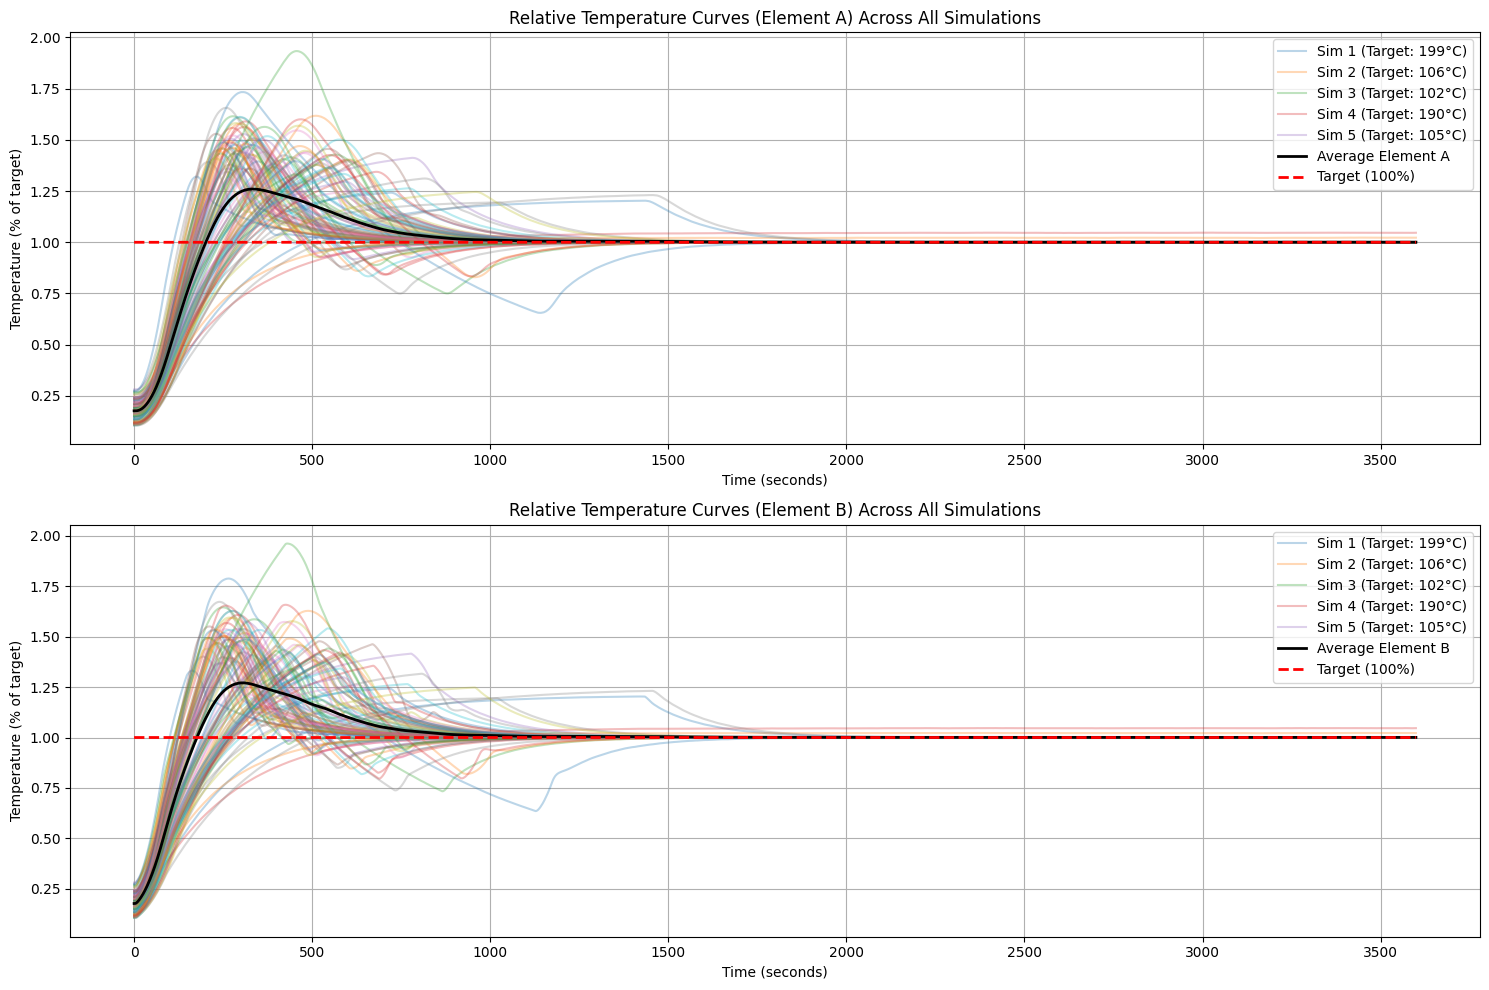

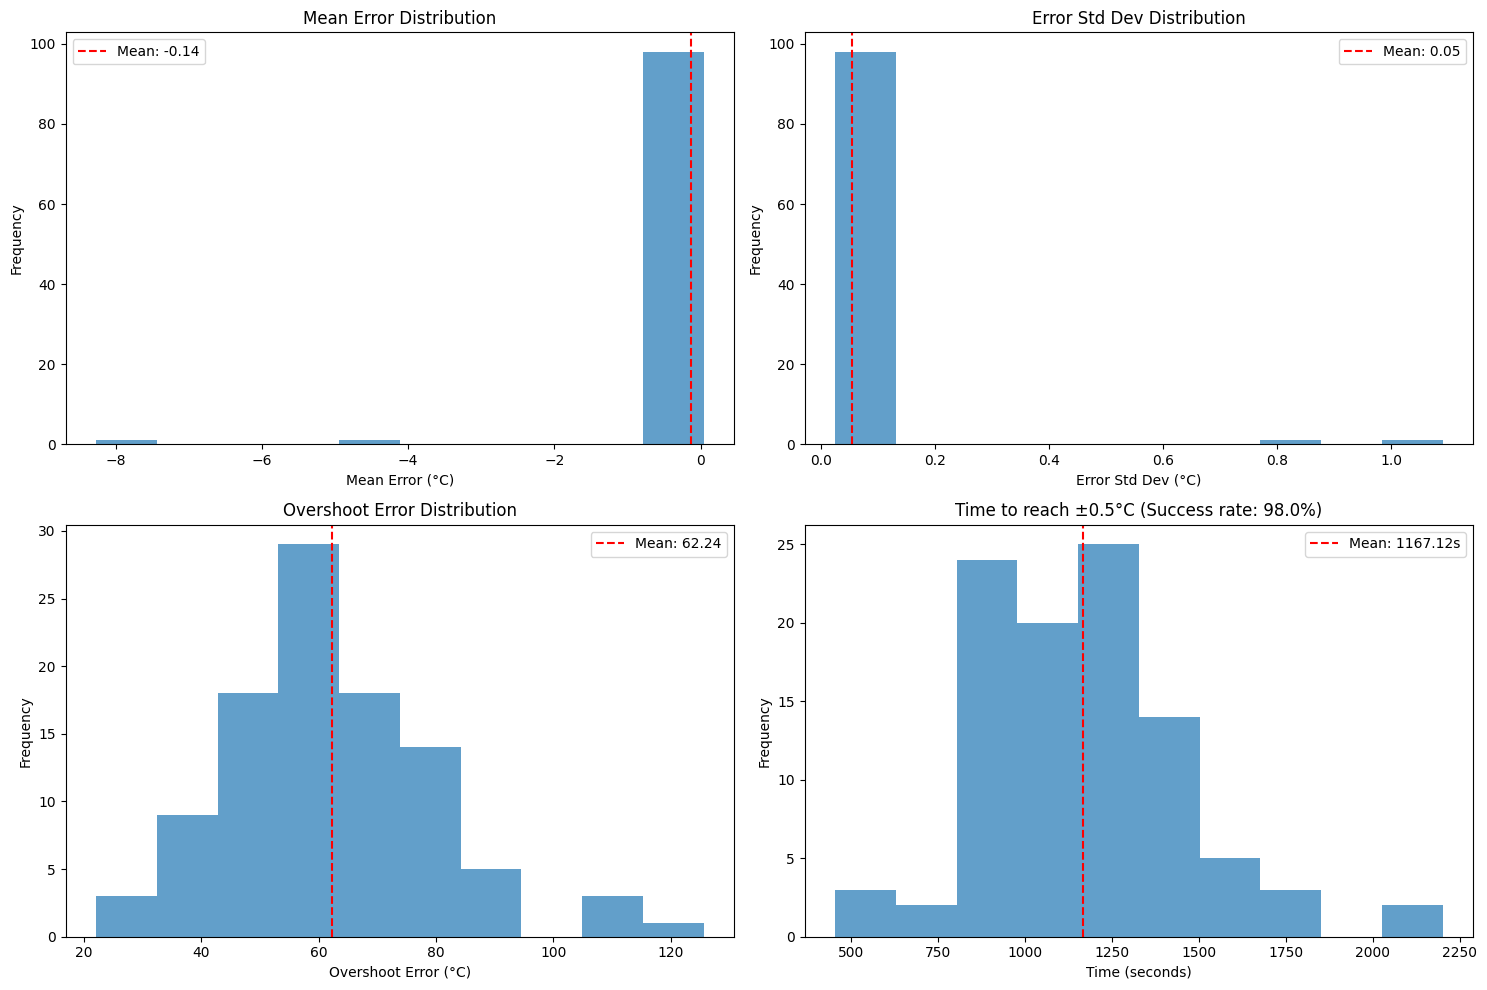

In [2]:
# Run multiple randomized simulations
print("\nRunning multiple randomized simulations...")
super_sim = tempsim.SuperTemperatureSimulation(
    control_function=pid_controller,
    n_simulations=100,
)

# Run all simulations
super_sim.run_simulations()

# Print aggregate statistics
super_sim.print_aggregate_statistics()

# Visualize results
super_sim.plot_temperature_comparison()
super_sim.plot_error_distribution()